## Visualisation of how landmark size and fog affect landmark visibility in the VR

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os import getcwd

%matplotlib inline

In [3]:
def myAxisTheme(myax):
    myax.get_xaxis().tick_bottom()
    myax.get_yaxis().tick_left()
    myax.spines['top'].set_visible(False)
    myax.spines['right'].set_visible(False)

In [16]:
# Set landmark dimensions in mm
LMwidth = 10
LMheight = 40

# Set maximum and minimum landmark distances to be cosidered (mm)
minDist = 0
maxDist = 80

# Set virtual fog parameter (minumum bound and upper bound)
minFog = 55
maxFog = 70

# Display size (pixels)
screenWidth = 720
screenHeight = 1280

In [17]:
nPts = 1 # number of points per mm

distRange = np.linspace(minDist,maxDist,(maxDist-minDist+1)*nPts)

In [18]:
# Visibility through virtual fog
maxVis = float(max(maxDist-maxFog, maxDist))
maxVisFog = float(min(maxFog, maxDist))

visibility = np.concatenate((100.0*np.ones((minFog-minDist)*nPts),
                             100.0 - np.linspace(0,100.0*((maxVisFog-minFog)/(maxFog-minFog)),(maxVisFog-minFog+1)*nPts),
                             0*np.ones((maxVis-maxVisFog)*nPts)))

In [19]:
# Size of landmark
angleWidth = lambda x: 180/np.pi * 2*np.arctan((LMwidth/2.0)/x)
angleHeight = lambda x: 180/np.pi * np.arctan((LMheight)/x)

alphaWidth = angleWidth(distRange)
alphaHeight = angleHeight(distRange)

/Users/hannah/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/Users/hannah/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


In [25]:
print(alphaWidth[np.where(distRange==minFog)[0]])
print(alphaHeight[np.where(distRange==minFog)[0]])

[ 10.38885782]
[ 36.02737339]


In [26]:
print(alphaWidth[np.where(distRange==maxFog)[0]])
print(alphaHeight[np.where(distRange==maxFog)[0]])

[ 8.17123356]
[ 29.7448813]


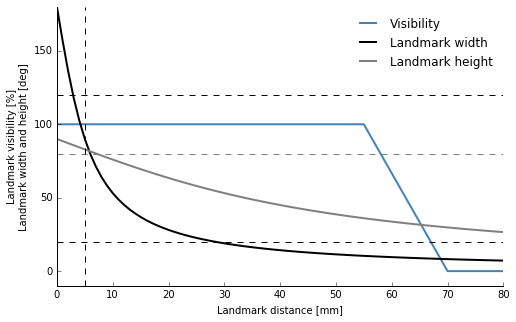

In [21]:
LMappearanceFig = plt.figure(figsize=(8,5))
LMappearancePlot = LMappearanceFig.add_subplot(111)

LMappearancePlot.plot(distRange, visibility, color='steelblue', linewidth=2)
LMappearancePlot.plot(distRange,alphaWidth, color='black', linewidth= 2)
LMappearancePlot.plot(distRange,alphaHeight, color='grey', linewidth= 2)

LMappearancePlot.axhline(y=20,linestyle='dashed',color='black')
LMappearancePlot.axhline(y=80,linestyle='dashed',color='grey')
LMappearancePlot.axhline(y=120,linestyle='dashed',color='black')

LMappearancePlot.axvline(x=LMwidth/2,linestyle='dashed',color='black')

LMappearancePlot.set_ylim(-10,180)
LMappearancePlot.set_xlabel('Landmark distance [mm]')
LMappearancePlot.set_ylabel('Landmark visibility [%]\nLandmark width and height [deg]')
leg = LMappearancePlot.legend(['Visibility', 'Landmark width','Landmark height'])
leg.get_frame().set_linewidth(0.0)
myAxisTheme(LMappearancePlot)

## Add reinforcement

In [125]:
maxR = 50
blR = 10
rR = 15

In [126]:
# Profile of reinforcement level 
maxrR = float(min(rR, maxDist))

profileR = np.concatenate((maxR - np.linspace(0,maxR*(maxrR/rR)-blR,(maxrR+1)*nPts),
                           blR*np.ones((maxDist-rR)*nPts)))

In [1]:
profileR[np.where(distRange==LMwidth/2)[0]]

NameError: name 'profileR' is not defined

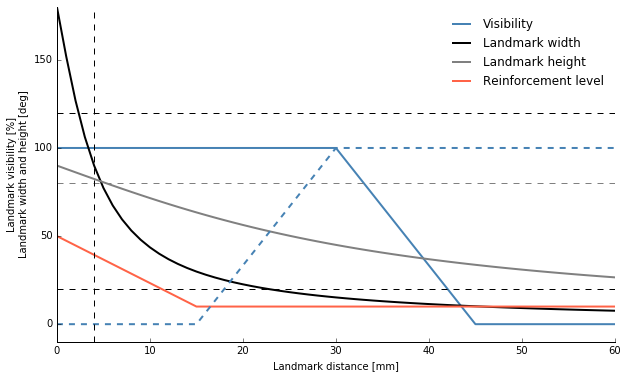

In [128]:
LMappearanceFig = plt.figure(figsize=(10,6))
LMappearancePlot = LMappearanceFig.add_subplot(111)

LMappearancePlot.plot(distRange, visibility, color='steelblue', linewidth=2)
LMappearancePlot.plot(distRange,alphaWidth, color='black', linewidth= 2)
LMappearancePlot.plot(distRange,alphaHeight, color='grey', linewidth= 2)
LMappearancePlot.plot(distRange,profileR, color='tomato', linewidth= 2)

LMappearancePlot.plot(distRange, visibility[::-1], color='steelblue', linewidth=2, linestyle='dashed')

LMappearancePlot.axhline(y=20,linestyle='dashed',color='black')
LMappearancePlot.axhline(y=80,linestyle='dashed',color='grey')
LMappearancePlot.axhline(y=120,linestyle='dashed',color='black')

LMappearancePlot.axvline(x=LMwidth/2,linestyle='dashed',color='black')

LMappearancePlot.set_ylim(-10,180)
LMappearancePlot.set_xlabel('Landmark distance [mm]')
LMappearancePlot.set_ylabel('Landmark visibility [%]\nLandmark width and height [deg]')
leg = LMappearancePlot.legend(['Visibility', 'Landmark width','Landmark height','Reinforcement level'])
leg.get_frame().set_linewidth(0.0)
myAxisTheme(LMappearancePlot)

## Interactive plot

In [148]:
from bokeh.io import output_notebook, push_notebook, push
from bokeh.layouts import widgetbox, row
from bokeh.models import CustomJS,Slider 
from bokeh.plotting import figure, output_file, show, ColumnDataSource

output_notebook()

Loading BokehJS ...

In [152]:
x=np.linspace(minDist,maxDist,(maxDist-minDist)*nPts)
y1=angleWidth(x)
y2=angleHeight(x)

vissource = ColumnDataSource(data=dict(x=x,y1=y1,y2=y2))

visplot = figure(y_range=(-10,180), x_range=(minDist, maxDist), plot_width=600,plot_height=400)

visplot.line('x','y1',source=vissource,line_width=2, color='black')
visplot.line('x','y2',source=vissource,line_width=2, color='grey')


callback = CustomJS(args=dict(source=vissource),code="""
    var data = source.data;
    var lmw = width.value;
    var lmh = height.value;
    
    x = data['x']
    y1 = data['y1']
    y2 = data['y2']
    
    for (i = 0; i < x.length; i++) {
        y1[i] = 180/Math.PI * 2*Math.atan((lmw/2.0)/x[i]);
        y2[i] = 180/Math.PI * Math.atan((lmh)/x[i]);
    }
    source.trigger('change');
""")

width_slider = Slider(start=0.5,end=20,value=10,step=0.5,title="Landmark width [mm]",callback=callback)
callback.args["width"] = width_slider

height_slider = Slider(start=1,end=60,value=40,step=1,title="Landmark height [mm]",callback=callback)
callback.args["height"] = height_slider

layout = row(
    visplot,
    widgetbox(width_slider, height_slider)
)

visplot.yaxis.axis_label = 'Angular size [deg]'
visplot.xaxis.axis_label = 'Landmark distance [mm]'

lohandle = show(layout, notebook_handle=True)
#push_notebook(handle=lohandle)

output_file('LandmarkSizePlot', title='Angular landmark size', mode='relative', root_dir=getcwd())

INFO:bokeh.core.state:Session output file 'LandmarkSizePlot' already exists, will be overwritten.


In [ ]:
# Landmark size in pixels (if in front of fly)

